# Parameters tuning

In [1]:
%matplotlib inline
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
gt = pd.read_csv('../../../dumps/references/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

## Number of trees
*n_estimators* represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

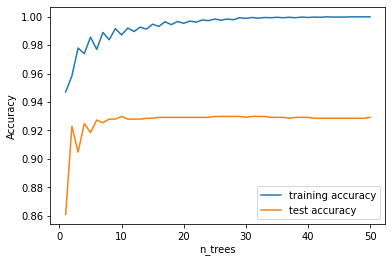

In [2]:
training_accuracy = [] 
test_accuracy = []
settings = range(1, 51)
for f in settings:
    clf = RandomForestClassifier(n_estimators=f, n_jobs=-1, random_state=0) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(settings, training_accuracy, label="training accuracy") 
plt.plot(settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_trees")
plt.legend()

It looks like in this case the more trees we build the more accurate our model gets, eventhough a small spike at *n=10* seems to provide better results for the test set.
## Depth
*max_depth* represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. We fit each decision tree with depths ranging from 1 to 32 and plot the training and test errors.

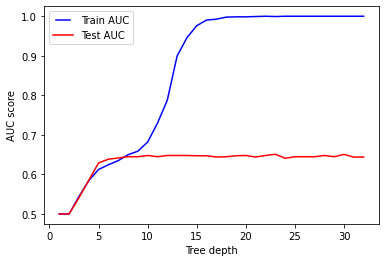

In [7]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(data_train, target_train)
   train_pred = rf.predict(data_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(data_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

We see that our model overfits for large depth values. The trees perfectly predicts all of the train data, however, it fails to generalize the findings for new data.
## Minimum number of samples (split)
*min_samples_split* represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, each tree in the forest becomes more constrained as it has to consider more samples at each node.

In [8]:
for i in range(2,11):
    print("min_samples_split set to %s" % i)
    tree = RandomForestClassifier(min_samples_split=i) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

min_samples_split set to 2
Accuracy on training set: 1.000
Accuracy on test set: 0.929
min_samples_split set to 3
Accuracy on training set: 1.000
Accuracy on test set: 0.930
min_samples_split set to 4
Accuracy on training set: 0.999
Accuracy on test set: 0.930
min_samples_split set to 5
Accuracy on training set: 0.999
Accuracy on test set: 0.929
min_samples_split set to 6
Accuracy on training set: 0.997
Accuracy on test set: 0.929
min_samples_split set to 7
Accuracy on training set: 0.993
Accuracy on test set: 0.930
min_samples_split set to 8
Accuracy on training set: 0.989
Accuracy on test set: 0.929
min_samples_split set to 9
Accuracy on training set: 0.984
Accuracy on test set: 0.929
min_samples_split set to 10
Accuracy on training set: 0.979
Accuracy on test set: 0.929


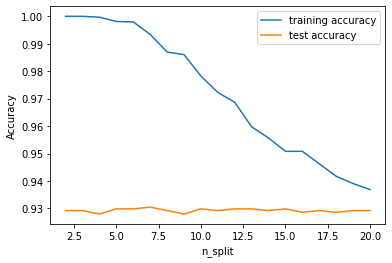

In [9]:
training_accuracy = [] 
test_accuracy = []
settings = range(2, 21)
for v in settings:
    clf = RandomForestClassifier(min_samples_split=v)  
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(settings, training_accuracy, label="training accuracy") 
plt.plot(settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_split")
plt.legend()

We can see that in this case improving the minimum value doesn't necessarily improve the accuracy, so we can keep the default value.
## Minimum number of samples (leaf)
*min_samples_leaf* is the minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples at the leafs, the base of the tree.

In [10]:
for i in range(1,11):
    print("min_samples_split set to %s" % i)
    tree = RandomForestClassifier(min_samples_leaf=i) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))

min_samples_split set to 1
Accuracy on training set: 1.000
Accuracy on test set: 0.929
min_samples_split set to 2
Accuracy on training set: 0.996
Accuracy on test set: 0.929
min_samples_split set to 3
Accuracy on training set: 0.971
Accuracy on test set: 0.929
min_samples_split set to 4
Accuracy on training set: 0.944
Accuracy on test set: 0.929
min_samples_split set to 5
Accuracy on training set: 0.932
Accuracy on test set: 0.929
min_samples_split set to 6
Accuracy on training set: 0.928
Accuracy on test set: 0.929
min_samples_split set to 7
Accuracy on training set: 0.925
Accuracy on test set: 0.930
min_samples_split set to 8
Accuracy on training set: 0.924
Accuracy on test set: 0.929
min_samples_split set to 9
Accuracy on training set: 0.925
Accuracy on test set: 0.929
min_samples_split set to 10
Accuracy on training set: 0.922
Accuracy on test set: 0.926


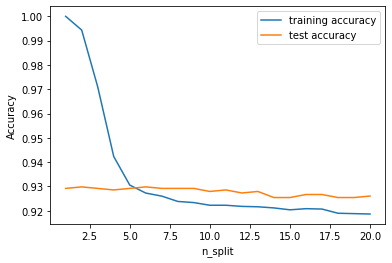

In [11]:
training_accuracy = [] 
test_accuracy = []
settings = range(1, 21)
for v in settings:
    clf = RandomForestClassifier(min_samples_leaf=v)  
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(settings, training_accuracy, label="training accuracy") 
plt.plot(settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_split")
plt.legend()

Same conclusion as the last experiment. A good compromise seems to be at *n=5*.
## Number of features
*max_features* represents the number of features to consider when looking for the best split. Since we're working with 119 different features, let's try all the values and see how relevant they are.

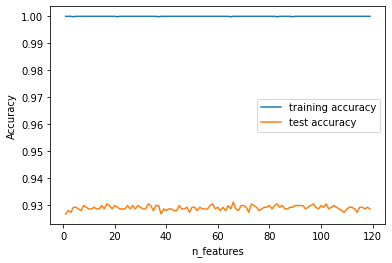

In [12]:
training_accuracy = [] 
test_accuracy = []
settings = range(1, 120)
for f in settings:
    clf = RandomForestClassifier(max_features=f, n_jobs=-1)
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(settings, training_accuracy, label="training accuracy") 
plt.plot(settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_features")
plt.legend()

In [ ]:
for i in range(1,11):
    print("min_samples_split set to %s" % i)
    tree = RandomForestClassifier(min_samples_leaf=i) 
    tree.fit(data_train, target_train)
    print("Accuracy on training set: {:.3f}".format(tree.score(data_train, target_train))) 
    print("Accuracy on test set: {:.3f}".format(tree.score(data_test, target_test)))